In [12]:
import pandas as pd
import numpy as np
import warnings

#warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

1.Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

2.Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

3.Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.

4.Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

5.İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [3]:
import pandas as pd
import numpy as np
import warnings


warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [4]:
states_all = pd.read_csv("states_all.csv")
states_all.head(10)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,...,57948.00,58025.00,41167.00,471564.00,196386.00,676174.00,208.33,252.19,207.96,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,...,9748.00,8789.00,6714.00,79117.00,30847.00,112335.00,nan,nan,nan,258.86
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,...,55433.00,49081.00,37410.00,437127.00,175210.00,614881.00,215.25,265.37,206.21,262.17
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,...,34632.00,36011.00,27651.00,281338.00,123113.00,405259.00,210.21,256.31,208.63,264.62
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,...,418418.00,363296.00,270675.00,3286034.00,1372011.00,4717112.00,208.40,260.89,196.76,nan
5,1992_COLORADO,COLORADO,1992,nan,3185173.00,163253.00,1307986.00,1713934.00,3264826.00,1642466.00,...,50648.00,45025.00,34533.00,394904.00,160299.00,562613.00,221.02,272.40,213.48,266.42
6,1992_CONNECTICUT,CONNECTICUT,1992,nan,3834302.00,143542.00,1342539.00,2348221.00,3721338.00,2148041.00,...,38058.00,33691.00,28366.00,304284.00,126917.00,436932.00,226.80,273.74,222.42,264.71
7,1992_DELAWARE,DELAWARE,1992,nan,645233.00,45945.00,420942.00,178346.00,638784.00,372722.00,...,8272.00,8012.00,6129.00,67495.00,28338.00,96296.00,217.90,262.87,206.39,261.58
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,nan,709480.00,64749.00,0.00,644731.00,742893.00,329160.00,...,5832.00,5000.00,3433.00,47009.00,18173.00,70000.00,192.60,234.92,178.56,265.98
9,1992_FLORIDA,FLORIDA,1992,nan,11506299.00,788420.00,5683949.00,5033930.00,11305642.00,5166374.00,...,164416.00,142372.00,100835.00,1276685.00,511557.00,1819706.00,213.69,259.91,204.88,262.12


1.Veri kümesinde yer alan değişkenlerinin tiplerini ve her bir değişkenin eksik (null) değer oranını bulun.

In [5]:
#Veri kümesinde yer alan değişkenlerinin tipleri 
states_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [10]:
Bos_yuzde = states_all.isnull().sum()/states_all.isnull().count()

In [6]:
Bos_Dolu_Durumu = states_all.isna()   
Bos_Dolu_Durumu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [11]:
#ilgili sütunda kaç adet boş /dolu hücre olduğu 
Bos_Hucre_Toplamı = Bos_Dolu_Durumu.sum()
Bos_Hucre_Toplamı

PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          263
TOTAL_REVENUE                   212
FEDERAL_REVENUE                 212
STATE_REVENUE                   212
LOCAL_REVENUE                   212
TOTAL_EXPENDITURE               212
INSTRUCTION_EXPENDITURE         212
SUPPORT_SERVICES_EXPENDITURE    212
OTHER_EXPENDITURE               263
CAPITAL_OUTLAY_EXPENDITURE      212
GRADES_PK_G                     173
GRADES_KG_G                     132
GRADES_4_G                      131
GRADES_8_G                      131
GRADES_12_G                     131
GRADES_1_8_G                    131
GRADES_9_12_G                   131
GRADES_ALL_G                    173
AVG_MATH_4_SCORE                956
AVG_MATH_8_SCORE                960
AVG_READING_4_SCORE             959
AVG_READING_8_SCORE             994
dtype: int64

In [7]:
# Eksik Degerler Nasil tespit edilir? 

#Pandas, bir veri çerçevesindeki her öğe için bir öğenin değeri yoksa (None) veya False ifadesini alırsa, True döndüren 
#.isnull () adlı bir metoda sahiptir. Ancak, bu metodu veri çerçevemizden çağırdığımızda, şunu elde ederiz:


states_all.isnull().head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


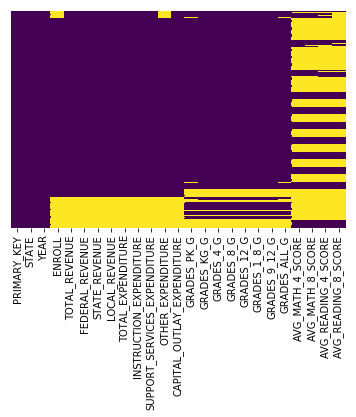

In [8]:
# null degerlere hizli bakis 
sns.heatmap(states_all.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# sarilar null degerleri 

In [9]:
#her bir değişkenin eksik (null) değer oranını: 

states_all.isnull().sum()/states_all.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

In [12]:
# Boş hücre sayısı x 100 / Tüm satır sayısı yaptığımızda 
# Boş Hücrelerin % sini bulmuş oluruz.
Bos_Hucre_Toplamı*100/len(states_all)

PRIMARY_KEY                     0.00
STATE                           0.00
YEAR                            0.00
ENROLL                         17.63
TOTAL_REVENUE                  14.21
FEDERAL_REVENUE                14.21
STATE_REVENUE                  14.21
LOCAL_REVENUE                  14.21
TOTAL_EXPENDITURE              14.21
INSTRUCTION_EXPENDITURE        14.21
SUPPORT_SERVICES_EXPENDITURE   14.21
OTHER_EXPENDITURE              17.63
CAPITAL_OUTLAY_EXPENDITURE     14.21
GRADES_PK_G                    11.60
GRADES_KG_G                     8.85
GRADES_4_G                      8.78
GRADES_8_G                      8.78
GRADES_12_G                     8.78
GRADES_1_8_G                    8.78
GRADES_9_12_G                   8.78
GRADES_ALL_G                   11.60
AVG_MATH_4_SCORE               64.08
AVG_MATH_8_SCORE               64.34
AVG_READING_4_SCORE            64.28
AVG_READING_8_SCORE            66.62
dtype: float64

2.Verimizde yıl (year) sütunu olduğunu farketmişsinizdir. 
Şimdilik yıl verisini unutun ve her bir gözlemin aynı yıl içerisinde yapıldığını farz edin. Her bir değişken için eksik değerleri nasıl doldurabileceğinizi düşünün. Eksik değerleri bir değerle doldurmak hangi değişkenler için anlamlı, hangileri için anlamsızdır?

In [15]:
states_all2 = states_all.copy()
states_all2.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,nan,2678885.00,304177.00,1659028.00,715680.00,2653798.00,1481703.00,...,57948.00,58025.00,41167.00,471564.00,196386.00,676174.00,208.33,252.19,207.96,nan
1,1992_ALASKA,ALASKA,1992,nan,1049591.00,106780.00,720711.00,222100.00,972488.00,498362.00,...,9748.00,8789.00,6714.00,79117.00,30847.00,112335.00,nan,nan,nan,258.86
2,1992_ARIZONA,ARIZONA,1992,nan,3258079.00,297888.00,1369815.00,1590376.00,3401580.00,1435908.00,...,55433.00,49081.00,37410.00,437127.00,175210.00,614881.00,215.25,265.37,206.21,262.17
3,1992_ARKANSAS,ARKANSAS,1992,nan,1711959.00,178571.00,958785.00,574603.00,1743022.00,964323.00,...,34632.00,36011.00,27651.00,281338.00,123113.00,405259.00,210.21,256.31,208.63,264.62
4,1992_CALIFORNIA,CALIFORNIA,1992,nan,26260025.00,2072470.00,16546514.00,7641041.00,27138832.00,14358922.00,...,418418.00,363296.00,270675.00,3286034.00,1372011.00,4717112.00,208.40,260.89,196.76,nan


Öğrenci sayıları ve mali hususları doldurmak mantıklı çünkü eksik sayısı fazla değil. Ama not değerlerinde eksik çok fazla.

    AVG_MATH_4_SCORE               0.64
    AVG_MATH_8_SCORE               0.64
    AVG_READING_4_SCORE            0.64
    AVG_READING_8_SCORE            0.67

In [21]:
#Islem icin sutun adlarini cekiyoruz 
#states_all.columns
sutunlar = states_all2.columns
print(sutunlar)


Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


In [22]:
numerik_sutunlar = ['TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

In [24]:
for sutun_adi in numerik_sutunlar:
    print(sutun_adi)
    for deger in states_all2[sutun_adi]:
        float(deger)
        
#sutunlar icinde ztn float oldugu icin uzun hata vermedi normal calisti. Float degerli verileri yazrdirdi.

TOTAL_EXPENDITURE
INSTRUCTION_EXPENDITURE
SUPPORT_SERVICES_EXPENDITURE
OTHER_EXPENDITURE
CAPITAL_OUTLAY_EXPENDITURE
GRADES_PK_G
GRADES_KG_G
GRADES_4_G
GRADES_8_G
GRADES_12_G
GRADES_1_8_G
GRADES_9_12_G
GRADES_ALL_G
AVG_MATH_4_SCORE
AVG_MATH_8_SCORE
AVG_READING_4_SCORE
AVG_READING_8_SCORE


In [25]:
#problemli dediğimiz değerler aslında float yada integer olması gerekip de object olarak kalan değerler. 
#Buradaki değerler zaten float. Problemli olma ihtimali yok.


for sutun_adi in sutunlar:
    print(sutun_adi)
    for deger in states_all2[sutun_adi]:
        try:
            float(deger)
        except:
            print(deger)

PRIMARY_KEY
1992_ALABAMA
1992_ALASKA
1992_ARIZONA
1992_ARKANSAS
1992_CALIFORNIA
1992_COLORADO
1992_CONNECTICUT
1992_DELAWARE
1992_DISTRICT_OF_COLUMBIA
1992_FLORIDA
1992_GEORGIA
1992_HAWAII
1992_IDAHO
1992_ILLINOIS
1992_INDIANA
1992_IOWA
1992_KANSAS
1992_KENTUCKY
1992_LOUISIANA
1992_MAINE
1992_MARYLAND
1992_MASSACHUSETTS
1992_MICHIGAN
1992_MINNESOTA
1992_MISSISSIPPI
1992_MISSOURI
1992_MONTANA
1992_NEBRASKA
1992_NEVADA
1992_NEW_HAMPSHIRE
1992_NEW_JERSEY
1992_NEW_MEXICO
1992_NEW_YORK
1992_NORTH_CAROLINA
1992_NORTH_DAKOTA
1992_OHIO
1992_OKLAHOMA
1992_OREGON
1992_PENNSYLVANIA
1992_RHODE_ISLAND
1992_SOUTH_CAROLINA
1992_SOUTH_DAKOTA
1992_TENNESSEE
1992_TEXAS
1992_UTAH
1992_VERMONT
1992_VIRGINIA
1992_WASHINGTON
1992_WEST_VIRGINIA
1992_WISCONSIN
1992_WYOMING
1993_ALABAMA
1993_ALASKA
1993_ARIZONA
1993_ARKANSAS
1993_CALIFORNIA
1993_COLORADO
1993_CONNECTICUT
1993_DELAWARE
1993_DISTRICT_OF_COLUMBIA
1993_FLORIDA
1993_GEORGIA
1993_HAWAII
1993_IDAHO
1993_ILLINOIS
1993_INDIANA
1993_IOWA
1993_KANSAS
199

RHODE_ISLAND
SOUTH_CAROLINA
SOUTH_DAKOTA
TENNESSEE
TEXAS
UTAH
VERMONT
VIRGINIA
WASHINGTON
WEST_VIRGINIA
WISCONSIN
WYOMING
ALABAMA
ALASKA
ARIZONA
ARKANSAS
CALIFORNIA
COLORADO
CONNECTICUT
DELAWARE
DISTRICT_OF_COLUMBIA
FLORIDA
GEORGIA
HAWAII
IDAHO
ILLINOIS
INDIANA
IOWA
KANSAS
KENTUCKY
LOUISIANA
MAINE
MARYLAND
MASSACHUSETTS
MICHIGAN
MINNESOTA
MISSISSIPPI
MISSOURI
MONTANA
NEBRASKA
NEVADA
NEW_HAMPSHIRE
NEW_JERSEY
NEW_MEXICO
NEW_YORK
NORTH_CAROLINA
NORTH_DAKOTA
OHIO
OKLAHOMA
OREGON
PENNSYLVANIA
RHODE_ISLAND
SOUTH_CAROLINA
SOUTH_DAKOTA
TENNESSEE
TEXAS
UTAH
VERMONT
VIRGINIA
WASHINGTON
WEST_VIRGINIA
WISCONSIN
WYOMING
ALABAMA
ALASKA
ARIZONA
ARKANSAS
CALIFORNIA
COLORADO
CONNECTICUT
DELAWARE
DISTRICT_OF_COLUMBIA
FLORIDA
GEORGIA
HAWAII
IDAHO
ILLINOIS
INDIANA
IOWA
KANSAS
KENTUCKY
LOUISIANA
MAINE
MARYLAND
MASSACHUSETTS
MICHIGAN
MINNESOTA
MISSISSIPPI
MISSOURI
MONTANA
NEBRASKA
NEVADA
NEW_HAMPSHIRE
NEW_JERSEY
NEW_MEXICO
NEW_YORK
NORTH_CAROLINA
NORTH_DAKOTA
OHIO
OKLAHOMA
OREGON
PENNSYLVANIA
RHODE_ISLAND
S

In [26]:
bos_yuzde2 = states_all2.isnull().sum()*100/states_all2.count()
bos_yuzde2.head()

PRIMARY_KEY      0.00
STATE            0.00
YEAR             0.00
ENROLL          21.40
TOTAL_REVENUE   16.56
dtype: float64

In [27]:
states_all2.STATE.value_counts().head()

DISTRICT_OF_COLUMBIA    29
VIRGINIA                28
COLORADO                26
OKLAHOMA                26
GEORGIA                 26
Name: STATE, dtype: int64

In [28]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    states_all2.loc[:, col].fillna(states_all2.loc[:, col].mean(), inplace=True)

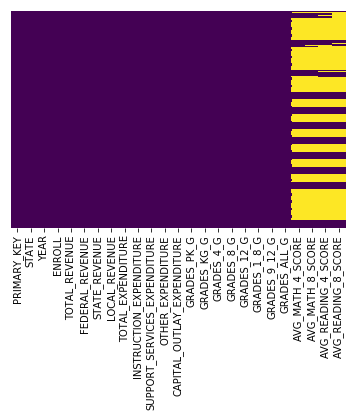

In [29]:
sns.heatmap(states_all2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [30]:
bos_yuzde2_after_fill = states_all2.isnull().sum()*100/states_all2.count()
bos_yuzde2_after_fill.head()

PRIMARY_KEY     0.00
STATE           0.00
YEAR            0.00
ENROLL          0.00
TOTAL_REVENUE   0.00
dtype: float64

3.Şimdi zaman faktörünü dikkate alma zamanı! 2. sorudaki cevabınızı tekrar gözden geçirin ve eksik verileri o yıl içerisinde gözlemlenen değerlere dayanarak doldurun. Örneğin, bir değeri ortalama değer ile doldurmak isterseniz, o yılın ortalamasını hesaplayın.


In [31]:
#Genel ortalama
states_all3 = states_all.copy()
states_all3.mean()

YEAR                              2004.43
ENROLL                          915930.82
TOTAL_REVENUE                  9092081.86
FEDERAL_REVENUE                 766372.34
STATE_REVENUE                  4216552.95
LOCAL_REVENUE                  4109156.57
TOTAL_EXPENDITURE              9196680.87
INSTRUCTION_EXPENDITURE        4762966.37
SUPPORT_SERVICES_EXPENDITURE   2680330.68
OTHER_EXPENDITURE               429204.62
CAPITAL_OUTLAY_EXPENDITURE      902769.29
GRADES_PK_G                      17601.61
GRADES_KG_G                      63746.76
GRADES_4_G                       64538.93
GRADES_8_G                       64271.06
GRADES_12_G                      54268.92
GRADES_1_8_G                    519214.04
GRADES_9_12_G                   247071.35
GRADES_ALL_G                    802441.51
AVG_MATH_4_SCORE                   234.77
AVG_MATH_8_SCORE                   278.41
AVG_READING_4_SCORE                218.87
AVG_READING_8_SCORE                263.66
dtype: float64

In [32]:
years = states_all.YEAR.unique()
print(years)

[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]


In [35]:
#ALTERNATIF YOL

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"] 

for col in fill_list:
    states_all3[col] = states_all3.groupby('YEAR')[col].transform(lambda x: x.fillna(np.round(x.mean())))

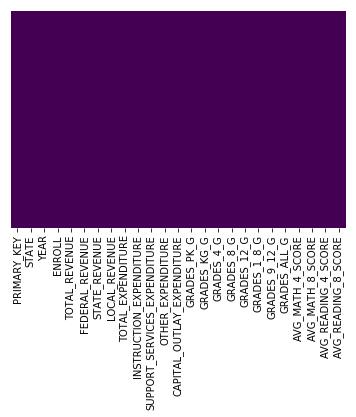

In [38]:
sns.heatmap(states_all3.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [37]:
#ALTERNATIF YOL 

for year in years: 
    states_all3["ENROLL"].fillna(states_all3.groupby(by='YEAR').mean()["ENROLL"].loc[year], inplace=True)
    states_all3["AVG_MATH_4_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_MATH_4_SCORE"].loc[year], inplace=True)
    states_all3["TOTAL_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["TOTAL_REVENUE"].loc[year], inplace=True)
    states_all3["FEDERAL_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["FEDERAL_REVENUE"].loc[year], inplace=True)
    states_all3["STATE_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["STATE_REVENUE"].loc[year], inplace=True)
    states_all3["LOCAL_REVENUE"].fillna(states_all3.groupby(by='YEAR').mean()["LOCAL_REVENUE"].loc[year], inplace=True)
    states_all3["TOTAL_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["TOTAL_EXPENDITURE"].loc[year], inplace=True)
    states_all3["INSTRUCTION_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["INSTRUCTION_EXPENDITURE"].loc[year], inplace=True)
    states_all3["SUPPORT_SERVICES_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["SUPPORT_SERVICES_EXPENDITURE"].loc[year], inplace=True)
    states_all3["OTHER_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["OTHER_EXPENDITURE"].loc[year], inplace=True)
    states_all3["CAPITAL_OUTLAY_EXPENDITURE"].fillna(states_all3.groupby(by='YEAR').mean()["CAPITAL_OUTLAY_EXPENDITURE"].loc[year], inplace=True)
    states_all3["GRADES_PK_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_PK_G"].loc[year], inplace=True)
    states_all3["GRADES_KG_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_KG_G"].loc[year], inplace=True)
    states_all3["GRADES_4_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_4_G"].loc[year], inplace=True)
    states_all3["GRADES_8_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_8_G"].loc[year], inplace=True)
    states_all3["GRADES_12_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_12_G"].loc[year], inplace=True)
    states_all3["GRADES_1_8_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_1_8_G"].loc[year], inplace=True)
    states_all3["GRADES_9_12_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_9_12_G"].loc[year], inplace=True)
    states_all3["GRADES_ALL_G"].fillna(states_all3.groupby(by='YEAR').mean()["GRADES_ALL_G"].loc[year], inplace=True)
    states_all3["AVG_MATH_8_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_MATH_8_SCORE"].loc[year], inplace=True)
    states_all3["AVG_READING_4_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_READING_4_SCORE"].loc[year], inplace=True)
    states_all3["AVG_READING_8_SCORE"].fillna(states_all3.groupby(by='YEAR').mean()["AVG_READING_8_SCORE"].loc[year], inplace=True)

In [39]:
#1. Alternatof Yol
#önce bir sutun alacak, sonra bir yıl: teker teker yılların boşlarını dolduracak, sonra diğer sütuna geçecek

states_all4 = states_all.copy()

for sutun_adi in fill_list:
    for year in years:
        states_all4[sutun_adi].fillna(states_all4.groupby(by='YEAR').mean()[sutun_adi].loc[year], inplace=True)


4.Bu sefer, eksik değerleri enterpolasyon yaparak doldurun.

In [40]:
states_all5 = states_all.copy()
for col in fill_list:
    states_all5.loc[:,col].interpolate(inplace=True)
    

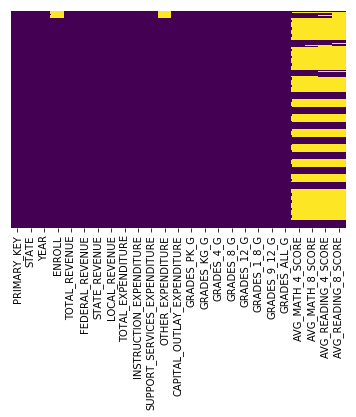

In [41]:
sns.heatmap(states_all5.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

5.İkinci, üçüncü ve dördüncü sorulardaki cevaplarınızı karşılaştırın. Anlamlı bir fark görebiliyor musunuz?

In [42]:
for col in fill_list:
    display ("{} sutunu icin istatistikler:".format(col))
    display(pd.concat([states_all[col],states_all2[col], states_all3[col], states_all4[col], states_all5[col]], axis=1).describe())

'ENROLL sutunu icin istatistikler:'

,ENROLL,ENROLL,ENROLL,ENROLL,ENROLL
count,1229.00,1492.00,1492.00,1492.00,1441.00
mean,915930.82,915930.82,907981.85,895857.42,795083.49
std,1065280.42,966772.54,967301.66,967746.54,1025900.78
min,43866.00,43866.00,43866.00,43866.00,43866.00
25%,258314.00,315094.00,315094.00,315094.00,130653.00
50%,648313.00,820414.00,802054.30,802054.33,496513.00
75%,1014528.00,921178.00,948608.00,921178.00,942738.00
max,6307022.00,6307022.00,6307022.00,6307022.00,6307022.00


'TOTAL_REVENUE sutunu icin istatistikler:'

,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE,TOTAL_REVENUE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,9092081.86,9092081.86,8929899.75,8449926.83,8090706.84
std,11745187.40,10878184.01,10941285.78,10992101.56,11153174.40
min,465650.00,465650.00,465650.00,465650.00,465650.00
25%,2186305.25,2546260.75,2546260.75,2546260.75,2044669.00
50%,5079546.00,6359310.50,5544501.50,4572764.39,4005586.00
75%,10859847.75,9276958.00,11093659.00,9276958.00,9276958.00
max,89217262.00,89217262.00,89217262.00,89217262.00,89217262.00


'FEDERAL_REVENUE sutunu icin istatistikler:'

,FEDERAL_REVENUE,FEDERAL_REVENUE,FEDERAL_REVENUE,FEDERAL_REVENUE,FEDERAL_REVENUE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,766372.34,766372.34,750234.97,699682.88,674956.52
std,1145241.59,1060702.42,1069743.91,1073294.17,1084241.64
min,31020.00,31020.00,31020.00,31020.00,31020.00
25%,189354.00,217020.00,217020.00,217020.00,123012.00
50%,403376.50,516741.00,426829.00,328684.00,328684.00
75%,828966.00,766372.34,869711.00,750503.25,750503.25
max,9990221.00,9990221.00,9990221.00,9990221.00,9990221.00


'STATE_REVENUE sutunu icin istatistikler:'

,STATE_REVENUE,STATE_REVENUE,STATE_REVENUE,STATE_REVENUE,STATE_REVENUE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,4216552.95,4216552.95,4140950.21,3914149.09,3784502.92
std,5543072.00,5133894.86,5161321.77,5187425.77,5242583.30
min,0.00,0.00,0.00,0.00,0.00
25%,1153097.25,1356434.00,1356434.00,1356434.00,1175899.00
50%,2537073.50,3127639.00,2737296.00,2122772.50,2122772.50
75%,5080939.25,4269811.00,5050045.25,4269811.00,4269811.00
max,50904567.00,50904567.00,50904567.00,50904567.00,50904567.00


'LOCAL_REVENUE sutunu icin istatistikler:'

,LOCAL_REVENUE,LOCAL_REVENUE,LOCAL_REVENUE,LOCAL_REVENUE,LOCAL_REVENUE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,4109156.57,4109156.57,4038714.55,3836094.85,3631247.39
std,5482970.61,5078230.02,5103991.52,5122393.18,5212326.44
min,22093.00,22093.00,22093.00,22093.00,22093.00
25%,715834.50,944796.25,944796.25,944796.25,745758.00
50%,2055780.50,2697257.00,2302755.50,2187420.35,1525442.00
75%,4768680.00,4109156.57,4827848.75,3959033.25,3959033.25
max,36105265.00,36105265.00,36105265.00,36105265.00,36105265.00


'TOTAL_EXPENDITURE sutunu icin istatistikler:'

,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE,TOTAL_EXPENDITURE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,9196680.87,9196680.87,9035473.33,8551148.00,8178959.83
std,11978126.90,11093928.44,11156055.55,11206825.46,11372469.58
min,481665.00,481665.00,481665.00,481665.00,481665.00
25%,2165404.50,2523968.50,2523968.50,2523968.50,2034229.00
50%,5234505.50,6520223.50,5637836.50,4653591.04,4025103.50
75%,10745191.00,9434922.00,10869508.25,9434922.00,9434922.00
max,85320133.00,85320133.00,85320133.00,85320133.00,85320133.00


'INSTRUCTION_EXPENDITURE sutunu icin istatistikler:'

,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE,INSTRUCTION_EXPENDITURE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,4762966.37,4762966.37,4679478.32,4434882.75,4217127.14
std,6293003.72,5828468.31,5859434.42,5883993.01,5980897.52
min,265549.00,265549.00,265549.00,265549.00,265549.00
25%,1168032.00,1343611.25,1343611.25,1343611.25,921494.00
50%,2657452.00,3358141.50,2885786.00,2454000.47,2095197.50
75%,5568028.00,4938819.75,5632717.25,4938819.75,4938819.75
max,43964520.00,43964520.00,43964520.00,43964520.00,43964520.00


'SUPPORT_SERVICES_EXPENDITURE sutunu icin istatistikler:'

,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,2680330.68,2680330.68,2633072.29,2494165.45,2382702.19
std,3353348.56,3105811.89,3125110.88,3139340.80,3190809.50
min,139963.00,139963.00,139963.00,139963.00,139963.00
25%,635790.00,767368.75,767368.75,767368.75,585700.00
50%,1525405.50,1913843.50,1636668.50,1370148.98,1161078.00
75%,3229650.75,2795887.50,3236339.00,2795887.50,2795887.50
max,26058021.00,26058021.00,26058021.00,26058021.00,26058021.00


'OTHER_EXPENDITURE sutunu icin istatistikler:'

,OTHER_EXPENDITURE,OTHER_EXPENDITURE,OTHER_EXPENDITURE,OTHER_EXPENDITURE,OTHER_EXPENDITURE
count,1229.00,1492.00,1492.00,1492.00,1441.00
mean,429204.62,429204.62,415711.99,397304.44,373941.23
std,534069.32,484683.23,487903.65,489567.53,510837.48
min,11541.00,11541.00,11541.00,11541.00,11541.00
25%,102831.00,135428.25,135428.25,135428.25,53790.00
50%,271596.00,367233.50,281146.00,248234.78,211713.00
75%,518600.00,456891.50,500551.25,456891.50,467321.00
max,3995951.00,3995951.00,3995951.00,3995951.00,3995951.00


'CAPITAL_OUTLAY_EXPENDITURE sutunu icin istatistikler:'

,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1280.00,1492.00,1492.00,1492.00,1492.00
mean,902769.29,902769.29,887369.88,832041.79,839046.06
std,1327561.82,1229564.18,1235878.38,1241793.61,1239500.57
min,12708.00,12708.00,12708.00,12708.00,12708.00
25%,181564.50,216339.75,216339.75,216339.75,216339.75
50%,510259.50,648217.50,551795.00,405007.80,454302.00
75%,966851.50,902769.29,1022395.00,897595.00,897595.00
max,10223657.00,10223657.00,10223657.00,10223657.00,10223657.00


'GRADES_PK_G sutunu icin istatistikler:'

,GRADES_PK_G,GRADES_PK_G,GRADES_PK_G,GRADES_PK_G,GRADES_PK_G
count,1319.00,1492.00,1492.00,1492.00,1492.00
mean,17601.61,17601.61,17106.55,16649.80,15792.65
std,30016.17,28221.11,28322.03,28343.31,28700.54
min,0.00,0.00,0.00,0.00,0.00
25%,2021.00,2449.00,2449.00,2449.00,1486.33
50%,8106.00,10505.00,9392.89,9392.89,5555.50
75%,22295.00,19149.25,21006.50,19149.25,19431.00
max,250911.00,250911.00,250911.00,250911.00,250911.00


'GRADES_KG_G sutunu icin istatistikler:'

,GRADES_KG_G,GRADES_KG_G,GRADES_KG_G,GRADES_KG_G,GRADES_KG_G
count,1360.00,1492.00,1492.00,1492.00,1492.00
mean,63746.76,63746.76,63545.77,63410.20,58444.16
std,80205.14,76572.55,76581.41,76580.17,78453.02
min,544.00,544.00,544.00,544.00,544.00
25%,11745.00,14016.00,14016.00,14016.00,9595.00
50%,41597.50,48897.00,48897.00,48897.00,38077.50
75%,73865.25,70372.75,70428.25,70372.75,70372.75
max,530531.00,530531.00,530531.00,530531.00,530531.00


'GRADES_4_G sutunu icin istatistikler:'

,GRADES_4_G,GRADES_4_G,GRADES_4_G,GRADES_4_G,GRADES_4_G
count,1361.00,1492.00,1492.00,1492.00,1492.00
mean,64538.93,64538.93,64325.90,64204.05,59214.24
std,80293.39,76685.00,76692.34,76692.60,78595.51
min,633.00,633.00,633.00,633.00,633.00
25%,13739.00,15195.50,15195.50,15195.50,9741.50
50%,43272.00,49884.50,49884.50,49884.50,37152.00
75%,75481.00,71814.25,71814.25,71814.25,71814.25
max,493415.00,493415.00,493415.00,493415.00,493415.00


'GRADES_8_G sutunu icin istatistikler:'

,GRADES_8_G,GRADES_8_G,GRADES_8_G,GRADES_8_G,GRADES_8_G
count,1361.00,1492.00,1492.00,1492.00,1492.00
mean,64271.06,64271.06,63821.79,63621.44,58943.26
std,78910.55,75364.30,75389.31,75393.40,77309.15
min,437.00,437.00,437.00,437.00,437.00
25%,13342.00,15682.75,15682.75,15682.75,9845.75
50%,43339.00,49571.00,49571.00,49571.00,37652.50
75%,76566.00,72131.00,72131.00,72131.00,72131.00
max,500143.00,500143.00,500143.00,500143.00,500143.00


'GRADES_12_G sutunu icin istatistikler:'

,GRADES_12_G,GRADES_12_G,GRADES_12_G,GRADES_12_G,GRADES_12_G
count,1361.00,1492.00,1492.00,1492.00,1492.00
mean,54268.92,54268.92,53708.50,53370.70,49749.66
std,67889.28,64838.33,64901.39,64902.98,66462.69
min,311.00,311.00,311.00,311.00,311.00
25%,10919.00,13437.00,13437.00,13437.00,8661.75
50%,36735.00,39566.00,39566.00,39566.00,32926.00
75%,67460.00,64616.25,64899.00,64616.25,64616.25
max,498403.00,498403.00,498403.00,498403.00,498403.00


'GRADES_1_8_G sutunu icin istatistikler:'

,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G,GRADES_1_8_G
count,1361.00,1492.00,1492.00,1492.00,1492.00
mean,519214.04,519214.04,517304.42,516275.70,476312.77
std,643638.43,614713.28,614781.73,614786.29,630183.68
min,4878.00,4878.00,4878.00,4878.00,4878.00
25%,110626.00,121152.25,121152.25,121152.25,78847.50
50%,345775.00,401586.50,401586.50,401586.50,304106.00
75%,611905.00,574911.75,574911.75,574911.75,574911.75
max,3929869.00,3929869.00,3929869.00,3929869.00,3929869.00


'GRADES_9_12_G sutunu icin istatistikler:'

,GRADES_9_12_G,GRADES_9_12_G,GRADES_9_12_G,GRADES_9_12_G,GRADES_9_12_G
count,1361.00,1492.00,1492.00,1492.00,1492.00
mean,247071.35,247071.35,244792.92,243640.33,226545.50
std,307705.63,293877.32,294063.62,294085.47,301273.53
min,1808.00,1808.00,1808.00,1808.00,1808.00
25%,51471.00,59197.50,59197.50,59197.50,38413.50
50%,164260.00,181701.00,181701.00,181701.00,143893.00
75%,290502.00,282539.00,282539.00,282539.00,282539.00
max,2013687.00,2013687.00,2013687.00,2013687.00,2013687.00


'GRADES_ALL_G sutunu icin istatistikler:'

,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G,GRADES_ALL_G
count,1319.00,1492.00,1492.00,1492.00,1492.00
mean,802441.51,802441.51,797709.61,793663.17,742448.35
std,970703.07,912652.17,912900.89,912974.20,930521.87
min,7254.00,7254.00,7254.00,7254.00,7254.00
25%,181065.00,229357.75,229357.75,229357.75,169160.25
50%,550342.00,647326.00,647326.00,647326.00,452735.50
75%,928275.50,872422.00,883005.00,872422.00,883062.25
max,5944746.00,5944746.00,5944746.00,5944746.00,5944746.00


In [43]:
print(states_all.ENROLL.mean())
print(states_all2.ENROLL.mean())
print(states_all3.ENROLL.mean())
print(states_all5.ENROLL.mean())
print(states_all4.ENROLL.mean())

915930.820992677
915930.8209926769
907981.8542105516
795083.4913254684
895857.4186773904


In [44]:
print(states_all.ENROLL.median())
print(states_all2.ENROLL.median())
print(states_all3.ENROLL.median())
print(states_all5.ENROLL.median())
print(states_all5.ENROLL.median())

648313.0
820414.0
802054.3035714285
496513.0
496513.0


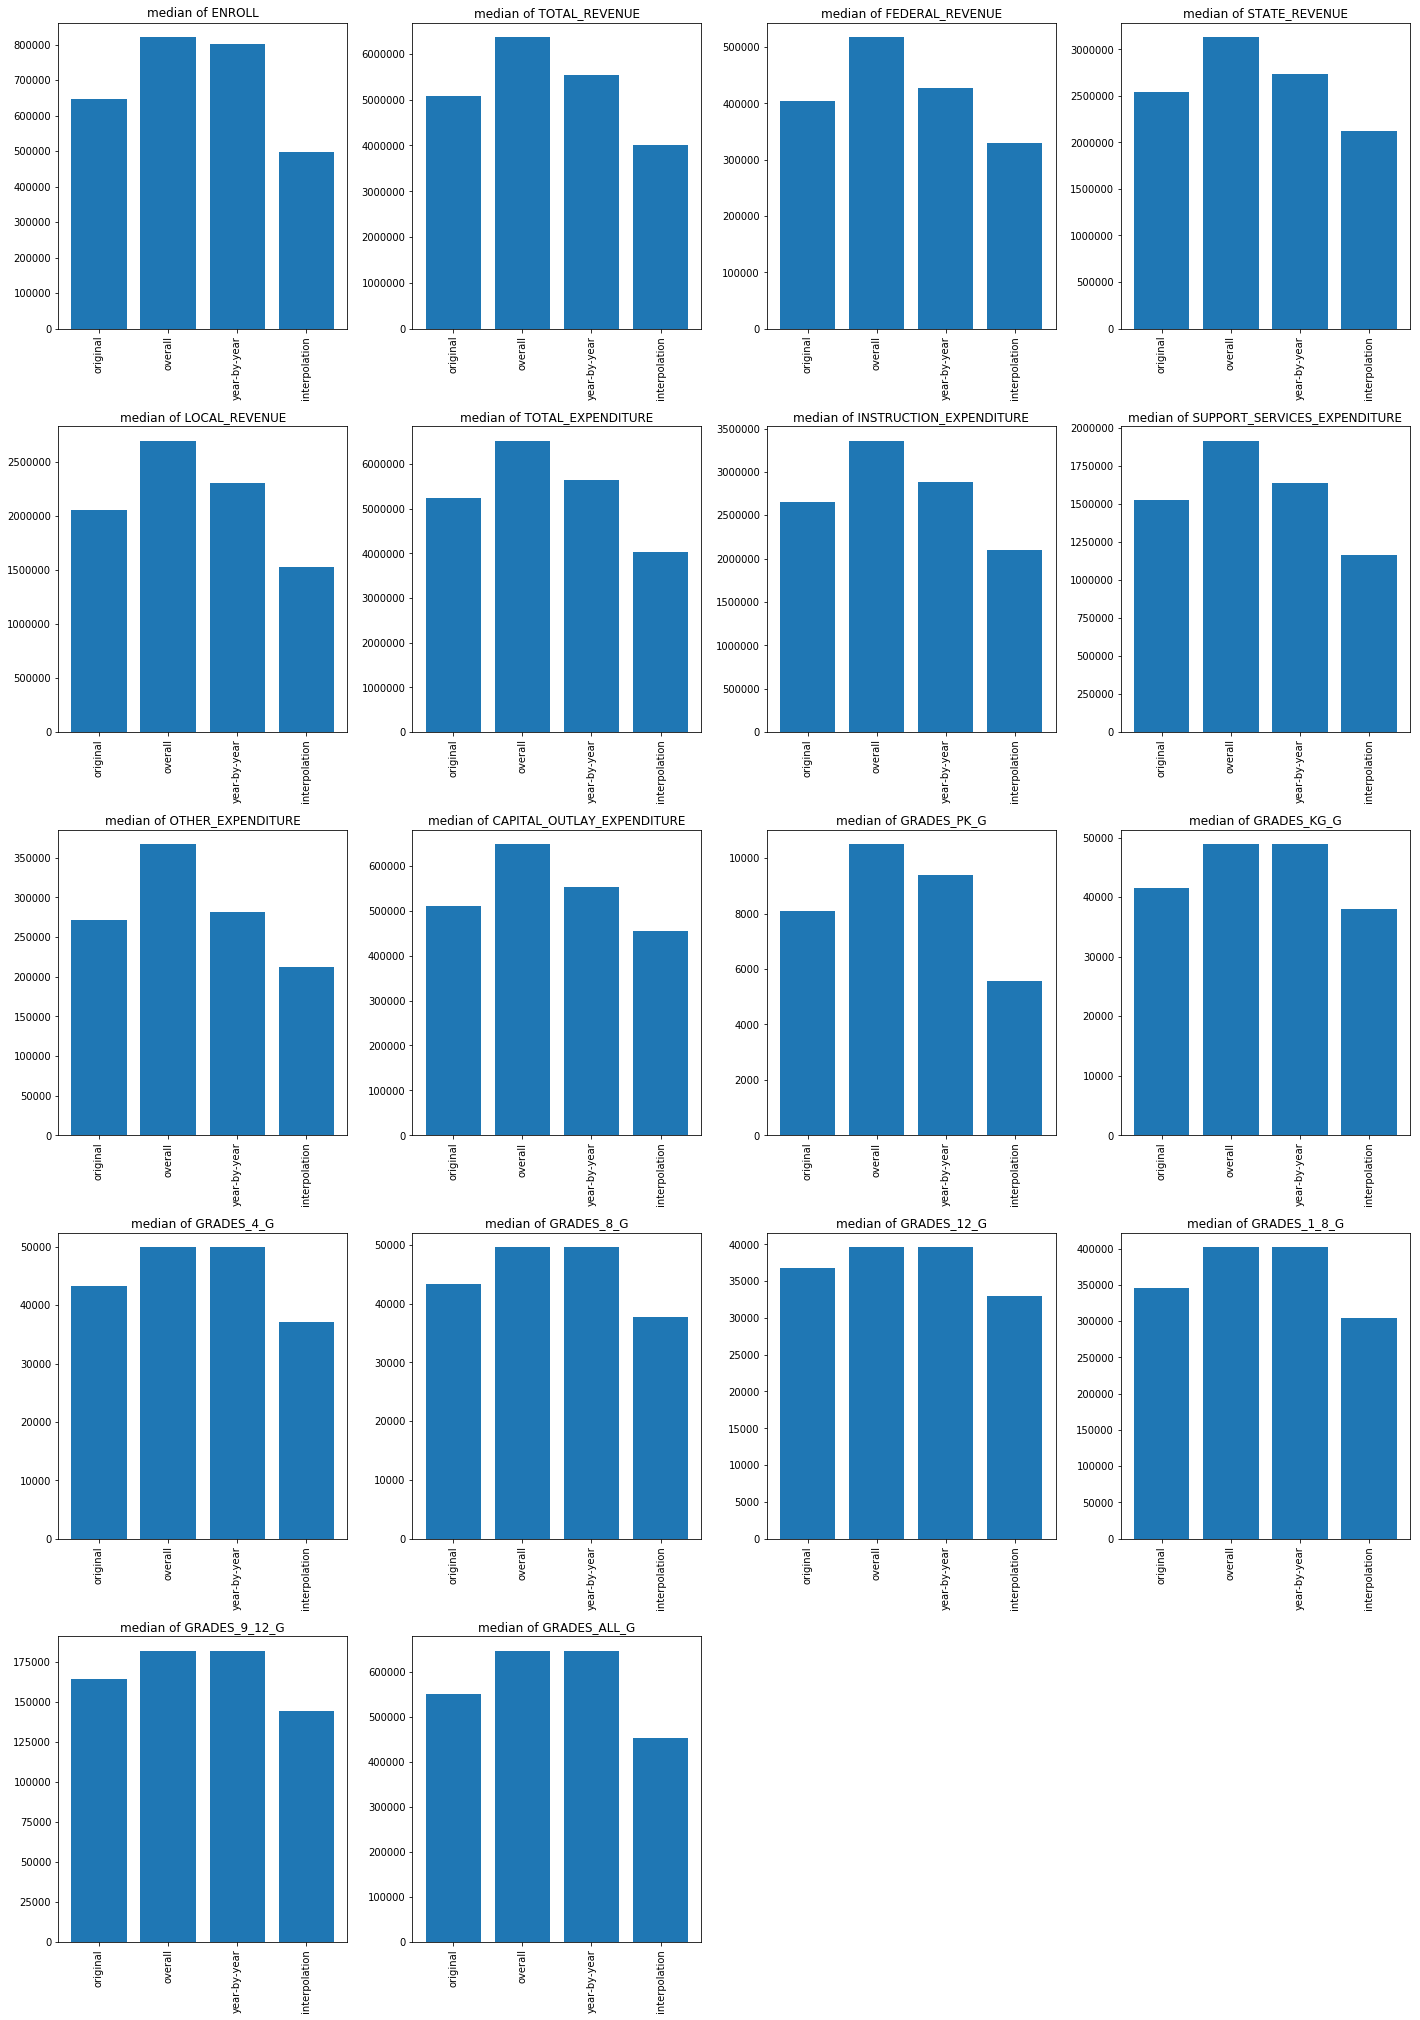

In [45]:
#Öncekinde kümelerini birleştirip medianına bakıyoduk. Bu sefer her birinin medyanını ayrı ayrı hesaplayıp listede bileştiriyoruz.
#Sonrada 4 elemanlı listenin bar grafiğini çiziyoruz.


fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = [states_all[col].median(), states_all2[col].median(),
                    states_all3[col].median(), states_all5[col].median()]
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df)
    plt.xticks(rotation='vertical')
    plt.title("median of {}".format(col))
    
plt.tight_layout()
plt.show()